<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week7/Deep_RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buat model Deep learning (Pilih TensorFlow atau PyTorch). untuk setiap dataset disamping buatlah Deep RNN
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Visualisasikan matriks akurasi dan loss.
3. Lakukan Hyperparameter Tuning untuk setiap Hyperparameter yang ada.
4. Akurasi pada Training dan Testing Set Minimal Sebesar 90%.
5. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan
     T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.



In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_tuner import RandomSearch
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
# Step 1: Mengumpulkan dan membersihkan data
from google.colab import files
uploaded = files.upload()  # Mengupload file dataset Anda

Saving DeteksiSarkasme_corrected (1).csv to DeteksiSarkasme_corrected (1).csv
Saving ReviewTokoBaju (1).csv to ReviewTokoBaju (1).csv


In [8]:
# Memuat dataset IMDB dari keras
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=10000)

# Padding pada data IMDB untuk memastikan semua urutan memiliki panjang yang sama
X_train_imdb = pad_sequences(X_train_imdb, maxlen=100, padding='post')
X_test_imdb = pad_sequences(X_test_imdb, maxlen=100, padding='post')

# Menampilkan ukuran dataset
print(f"Training data shape: {X_train_imdb.shape}")
print(f"Testing data shape: {X_test_imdb.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 100)
Testing data shape: (25000, 100)


In [10]:
# Menghapus baris yang memiliki NaN pada kolom 'Review Text'
data_review = data_review.dropna(subset=['Review Text'])

# Memastikan bahwa semua data di 'Review Text' adalah string
data_review['Review Text'] = data_review['Review Text'].astype(str)

# Tokenisasi dan padding pada teks ulasan ReviewTokoBaju
tokenizer_review = Tokenizer(num_words=10000)
tokenizer_review.fit_on_texts(data_review['Review Text'])
X_review = tokenizer_review.texts_to_sequences(data_review['Review Text'])
X_review = pad_sequences(X_review, maxlen=100, padding='post')

y_review = data_review['Sentiment'].values
X_train_review, X_test_review, y_train_review, y_test_review = train_test_split(X_review, y_review, test_size=0.2, random_state=42)

# Menampilkan beberapa baris data untuk memverifikasi hasil preprocessing
data_review.head()


<ipython-input-10-e7b2303ee9c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_review['Review Text'] = data_review['Review Text'].astype(str)


,Review Text,Rating,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1


In [12]:
# Memuat DeteksiSarkasme Dataset
file_path_sarkasme = '/content/DeteksiSarkasme_corrected (1).csv'
data_sarkasme = pd.read_csv(file_path_sarkasme)

# Memastikan bahwa kolom 'headline' dan 'is_sarcastic' ada
data_sarkasme = data_sarkasme[['headline', 'is_sarcastic']]

# Tokenisasi dan padding pada teks Deteksi Sarkasme
tokenizer_sarkasme = Tokenizer(num_words=10000)
tokenizer_sarkasme.fit_on_texts(data_sarkasme['headline'])
X_sarkasme = tokenizer_sarkasme.texts_to_sequences(data_sarkasme['headline'])
X_sarkasme = pad_sequences(X_sarkasme, maxlen=100, padding='post')

y_sarkasme = data_sarkasme['is_sarcastic'].values

# Membagi data menjadi set pelatihan dan pengujian
X_train_sarkasme, X_test_sarkasme, y_train_sarkasme, y_test_sarkasme = train_test_split(X_sarkasme, y_sarkasme, test_size=0.2, random_state=42)

# Cek apakah variabel sudah terdefinisi dengan benar
print(X_train_sarkasme.shape, X_test_sarkasme.shape)


(21367, 100) (5342, 100)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


334/334 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9389 - loss: 0.1713 - val_accuracy: 0.8667 - val_loss: 0.3382
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9521 - loss: 0.1361 - val_accuracy: 0.8639 - val_loss: 0.3664
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9630 - loss: 0.1094 - val_accuracy: 0.8589 - val_loss: 0.4327
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9743 - loss: 0.0830 - val_accuracy: 0.8564 - val_loss: 0.4795
Epoch 5/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9808 - loss: 0.0641 - val_accuracy: 0.8521 - val_loss: 0.5759


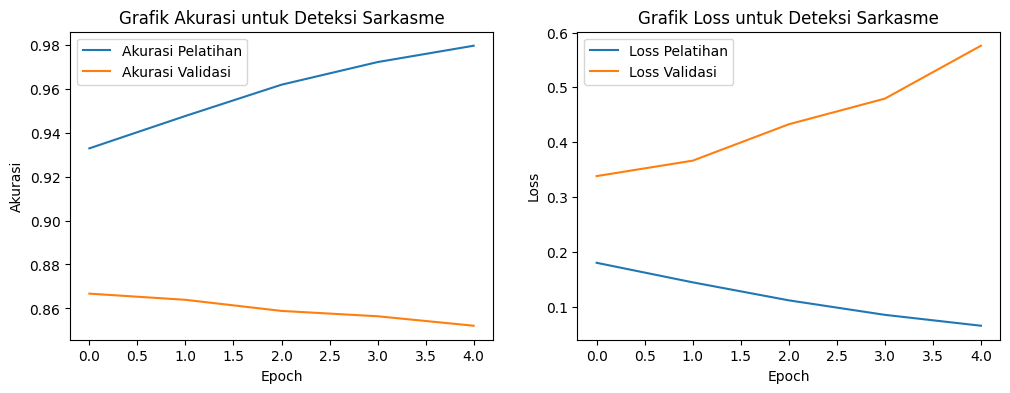

In [17]:
# Mengambil model terbaik dari tuner
best_model_sarkasme = tuner_sarkasme.get_best_models(num_models=1)[0]

# Melakukan pelatihan ulang untuk mendapatkan history (pastikan training sudah selesai)
history_best_sarkasme = best_model_sarkasme.fit(X_train_sarkasme, y_train_sarkasme, epochs=5, batch_size=64, validation_data=(X_test_sarkasme, y_test_sarkasme))

# 7. Visualisasi Akurasi dan Loss untuk Deteksi Sarkasme
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_best_sarkasme.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history_best_sarkasme.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi untuk Deteksi Sarkasme')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_best_sarkasme.history['loss'], label='Loss Pelatihan')
plt.plot(history_best_sarkasme.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss untuk Deteksi Sarkasme')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Classification Report for Deteksi Sarkasme:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2996
           1       0.85      0.80      0.83      2346

    accuracy                           0.85      5342
   macro avg       0.85      0.85      0.85      5342
weighted avg       0.85      0.85      0.85      5342

Akurasi: 0.8521
AUC: 0.8470


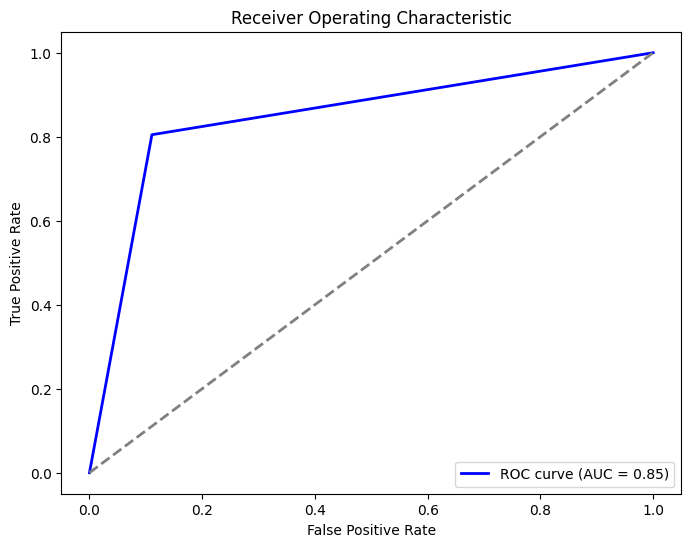

In [18]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluasi model terbaik untuk Deteksi Sarkasme
y_pred_best_sarkasme = (best_model_sarkasme.predict(X_test_sarkasme) > 0.5).astype("int32")

# 1. Menampilkan Classification Report
print("Classification Report for Deteksi Sarkasme:")
print(classification_report(y_test_sarkasme, y_pred_best_sarkasme))

# 2. Akurasi
accuracy = accuracy_score(y_test_sarkasme, y_pred_best_sarkasme)
print(f"Akurasi: {accuracy:.4f}")

# 3. Precision, Recall, F1-Score (sudah ditampilkan dalam classification_report)
# 4. AUC (Area Under Curve)
auc = roc_auc_score(y_test_sarkasme, y_pred_best_sarkasme)
print(f"AUC: {auc:.4f}")

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_sarkasme, y_pred_best_sarkasme)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [2]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00
